In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [35]:
df = pd.read_csv("Test.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [41]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [43]:
df.columns 

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [ ]:
# Drop missing values
df.dropna(inplace=True)

In [ ]:

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [33]:
# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [31]:
# Select numerical features for clustering
features = df[['Age', 'Spending_Score', 'Work_Experience', 'Family_Size']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [29]:
# Determine optimal clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

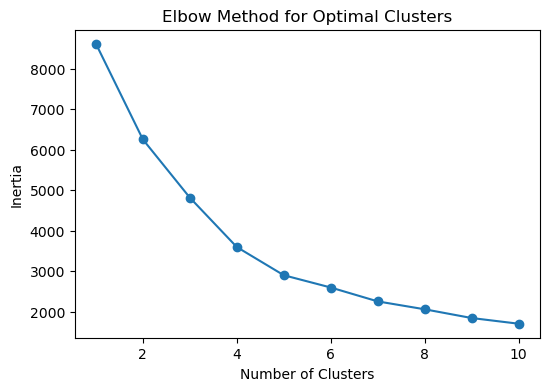

In [25]:
# Plot Elbow Method
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means with optimal clusters (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Segment"] = kmeans.fit_predict(scaled_features)

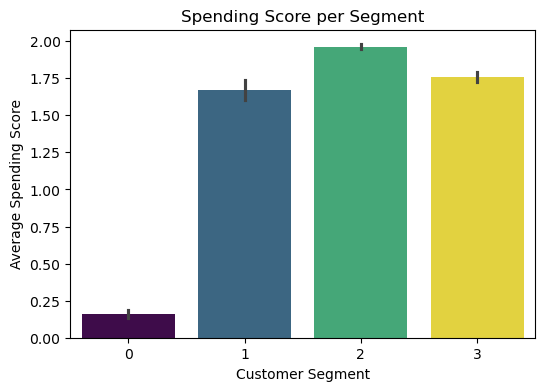

In [17]:
# Visualization 1: Bar Chart (Average Spending Score per Segment)
plt.figure(figsize=(6,4))
sns.barplot(x="Segment", y="Spending_Score", hue="Segment", data=df, estimator=np.mean, palette="viridis", legend=False)
plt.xlabel("Customer Segment")
plt.ylabel("Average Spending Score")
plt.title("Spending Score per Segment")
plt.show()

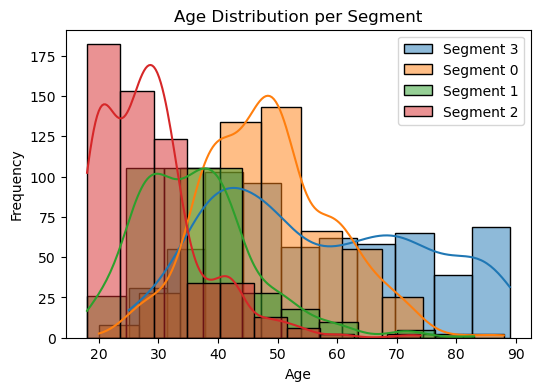

In [19]:

# Visualization 2: Histogram (Age Distribution per Segment)
plt.figure(figsize=(6,4))
for segment in df["Segment"].unique():
    sns.histplot(df[df["Segment"] == segment]["Age"], bins=10, kde=True, label=f"Segment {segment}")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution per Segment")
plt.legend()
plt.show()

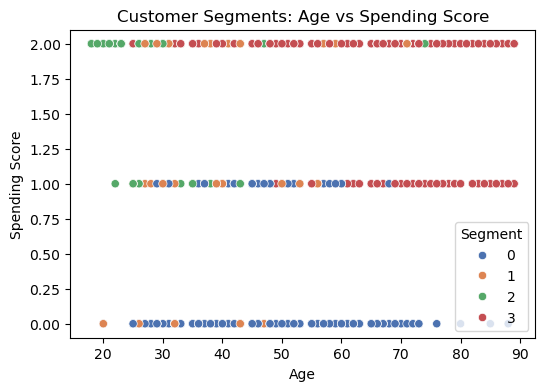

In [21]:
# Visualization 3: Scatter Plot (Age vs Spending Score with Segments)
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Age"], y=df["Spending_Score"], hue=df["Segment"], palette="deep")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segments: Age vs Spending Score")
plt.show()